Name: Ilia Mitrokhin

EMAIL: i.mitrokhin@innopolis.university

Group: DS-02

# What is the conditional distribution of X, the number of samples having a Chlorine concentration above the threshold, given θ?

If we consider that n = number of samples and x = number of samples with concentration of Chlorine above the governmental standards, we obtain a formula

$ P(X=x|Θ) = C_n^x * θ^x * (1 - Θ)^{n-x}$


## Task 2 Before the experiment, the control service experts elicited that the expected value of θ is 0.2 with a standard deviation of 0.16. Determine the parameters α and β of a Beta prior distribution for θ with this prior mean and standard deviation. (Round α and β to the nearest integer).

For beta distribution we know that mean = $ \frac {\alpha}{α + β} $ and std = ${\sqrt \frac {α * β}{(α + β)^2 * (α + β + 1)}}$

Using simple math, we obtain that $4α = β$ (from mean equation). Substitute into the std equation, we obtain value of alpha = 1.05, substite α back, β = 4.2
(Rounding to the neares integer, we obtain) α = 1 and β = 4.



# Find the posterior distribution of θ and summarize it by its posterior mean and standard deviation.

Posterior distribution is propotional to the likelihood * prior distribution. In task 1 we obtain likelihood, in the task 2 we have beta prior distribution.
Propotional mean that we have ignore constans ($C_n^k$) and beta function integral in beta distribution.

Let's build it with the following α and β parameters:

$F_θ (Θ) = \frac {1}{Β(α, β)} * Θ^{α - 1} * (1 - Θ)^{β - 1}$



$ Posterior \propto likelihood * prior ∝   θ^x * (1 - Θ)^{n-x} * Θ^{α - 1} * (1 - Θ)^{β - 1} ∝ Θ^{x + α - 1} * (1-Θ)^{n - x + β - 1}$

Therefore, we obtain new beta-distribution with α = x + α and β = n - x + β

Calculatin mean by previous formulas and using python:

In [2]:
# Setting values for distribution
x = 11
alpha = 1
n = 57
beta = 4
# calculating new values
new_alpha = x + alpha
new_beta = n - x + beta
# Calculating mean and std of the distribution
posterior_mean = (new_alpha) / (new_alpha + new_beta)
print("posterior mean:", posterior_mean)
num = new_alpha * new_beta
denom = (new_alpha + new_beta)**2 * (new_alpha + new_beta + 1)
posterior_std = (num/denom) ** 0.5
print("posterior_std:", posterior_std)

posterior mean: 0.1935483870967742
posterior_std: 0.04977527418131997


# Plot the prior, posterior and normalized likelihood.



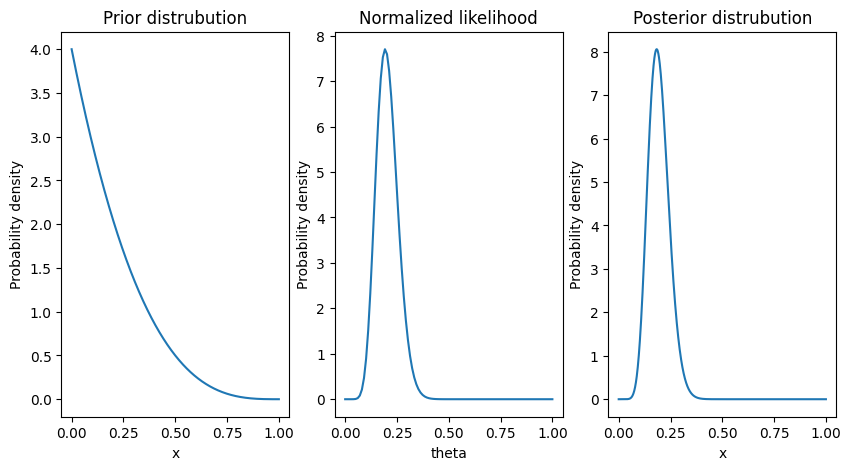

In [19]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import math
x = np.linspace(0, 1, 1000)
# parameters for prior distribution
alpha = 1
betta = 4
fig, ax = plt.subplots(1,3, figsize = (10, 5))
# Creating prior beta distribution function and plotting
prior = beta.pdf(x, alpha, betta)
ax[0].plot(x, prior)
ax[0].set_title("Prior distrubution")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Probability density")
# Creating posterior beta distribution function and plotting
posterior = beta.pdf(x, new_alpha, new_beta)
ax[2].plot(x, posterior)
ax[2].set_title("Posterior distrubution")
ax[2].set_xlabel("x")
ax[2].set_ylabel("Probability density")
# Creating likelihood function
def likelihood(theta, x, n):
    return math.comb(n, x) * (theta**x) * ((1 - theta)**(n - x))

x = 11
n = 57
# Creating and plotting likelihood function
theta = np.linspace(0, 1, 100)
likelihood = math.comb(n, x) * (theta**x) * ((1 - theta) ** (n - x))
# normalize likelihood
normalized_likelihood = likelihood / np.trapz(likelihood, theta)
ax[1].plot(theta, normalized_likelihood)
ax[1].set_title("Normalized likelihood")
ax[1].set_xlabel("theta")
ax[1].set_ylabel("Probability density")
plt.show()


# Find the posterior probability that θ < 0.07.

Let's build CDF and substite a value of 0.07


In [4]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
alpha = 12
betta = 50
val = 0.07

# Calculate the probability that x is less than 0.07
probability = beta.cdf(val, alpha, betta)

print("Probability that x is less than 0.07:", probability)


Probability that x is less than 0.07: 0.0009493259260248556


#  Find a central 95% posterior credible interval for θ.
We should drop left 2.5% and right 2.5% of the distribution

In [5]:
lower_bound = beta.ppf(0.025, new_alpha, new_beta)
upper_bound = beta.ppf(0.975, new_alpha, new_beta)

print("Central 95% posterior credible interval: [", lower_bound, ";", upper_bound, "]")

Central 95% posterior credible interval: [ 0.10599421987043234 ; 0.299786377267992 ]
